<font color = green >

# Home work LESSON 18 - CLUSTERRING

</font>

In [8]:
#------ Clusterring
#----Home Task
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


In [10]:
#------- Main functions-----
def draw_clustered(X, predicted, cluster_centers_, fig_title=''):
    plt.figure()
    # draw samples 
    colors= np.array(['blue', 'green', 'red', 'orange', 'brown','black' , ''])
    plt.scatter(X[:,0],X[:,1], c= colors[predicted], s=5)

    # draw centroids 
    if not(cluster_centers_ is None):
        for i, c in enumerate (cluster_centers_):    
            plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=25) 
        plt.title(fig_title+' ('+str(n_Clusters)+' - clusters)')
    else:
        plt.title(fig_title)
    plt.show()
    return

def plot_distortions(X):
    # k means determine k
    distortions = []
    Delta=0
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        # cdist(X, kmeanModel.cluster_centers_, 'euclidean') - matrix of distances between each x and eac h cluster,  shape = (len(X), k)
        # then get min distance for each samnple (axis=1)    
        # sum up all distances
        # get averarage for all samples     
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        if k>1:
            Delta_new=abs(distortions[k-1]-distortions[k-2])
            # print(f'Delta_new is {Delta_new}')
            if Delta_new>0.05: 
                Delta=Delta_new
                number_of_clusters=k
                # print(f'Delta is {Delta}, cluster is {number_of_clusters}')
            
    # Plot the elbow
    plt.figure()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k'+' ('+str(number_of_clusters)+' - clusters)')
    plt.show()
    return number_of_clusters

<font color = green >

# Input data

</font>

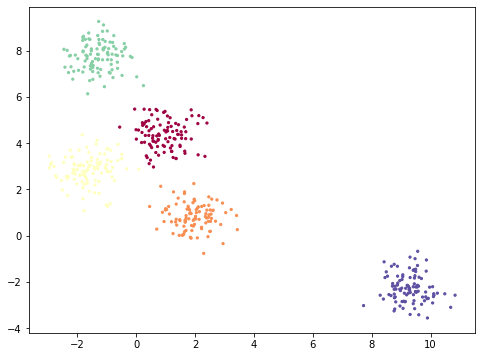

In [11]:
#-----Tasks

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 5)

<font color = green >

# Clustering - KMEANS (ELBOW) and calculating the number of clusters

</font>

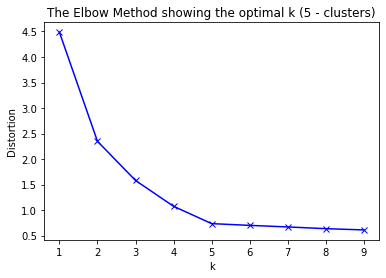

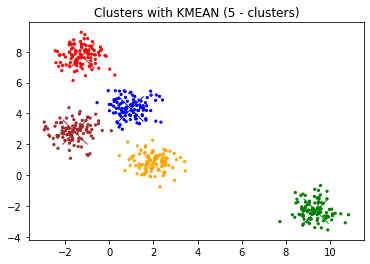

The number of detected clusters are: 5


In [12]:
#==========Clustering using Kmeans
n_Clusters=plot_distortions(X)
kmeanModel = KMeans(n_clusters=n_Clusters).fit(X)
labels_KMEAN=kmeanModel.labels_
draw_clustered(X, labels_KMEAN, kmeanModel.cluster_centers_, 'Clusters with KMEAN')

print(f'The number of detected clusters are: {n_Clusters}')

<font color = green >

# DBSCAN - clustering

</font>

Text(0.5, 1.0, 'Estimated number of clusters: 7')

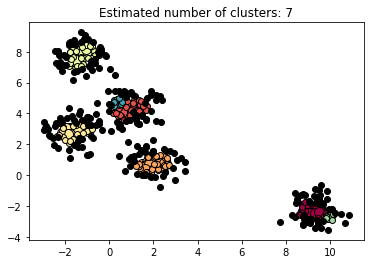

In [13]:
#==========Clustering using DBSCAN
predicted_DBSCAN = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels_DBSCAN = predicted_DBSCAN.labels_

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_DBSCAN)) - (1 if -1 in labels_DBSCAN else 0)
n_noise_ = list(labels_DBSCAN).count(-1)
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels_DBSCAN)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_DBSCAN == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

<font color = green >

# AgglomerativeClustering (with complete linkage)

</font>

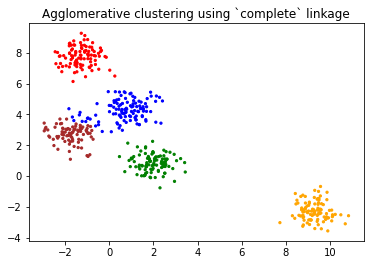

In [14]:
#==========Clustering with complete linkage
clustering = AgglomerativeClustering(n_clusters=n_Clusters, linkage='complete').fit(X)
labels_Agglom_complete=clustering.labels_
draw_clustered(X, labels_Agglom_complete, None, "Agglomerative clustering using `complete` linkage")


<font color = green >

# AgglomerativeClustering (with single linkage)

</font>

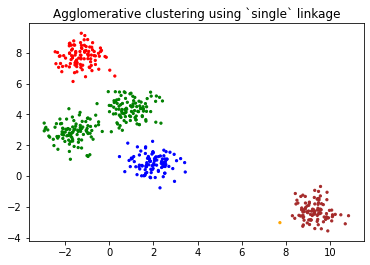

In [15]:
#==========Clustering with single linkage
# center_cluster = AgglomerativeClustering(n_clusters=n_Clusters, linkage='single').fit_predict(X)
clustering = AgglomerativeClustering(n_clusters=n_Clusters, linkage='single').fit(X)
labels_Agglom_single=clustering.labels_
draw_clustered(X, labels_Agglom_single, None, "Agglomerative clustering using `single` linkage")